# **Churn Prediction Model and Heroku Deployment**

A churn prediction model built with pandas and scikit-learn, deployed on Heroku, predicts customer churn based on historical data, helping businesses identify at-risk customers and take proactive measures to retain them.

### ***Step 1: Preprocessing the Data:***


1. Handle missing values: Check for any missing values in the dataset and decide how to handle them (e.g., imputation, dropping rows/columns).
2. Encode categorical variables: Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.
3. Split the data: Split the dataset into features (X) and target variable (y).**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/Telecoms Company data.csv'
data = pd.read_csv(file_path)

print (data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4         

In [ ]:
# Handle missing values (if any)
data.dropna(inplace=True)

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Split the data into features (X) and target variable (y)
X = data_encoded.drop(columns=['Churn_Yes'])
y = data_encoded['Churn_Yes']


### **Step 2: Train Your Churn Prediction Model**

1. Import necessary libraries and load your dataset.
2. Preprocess your data (handle missing values, encode categorical variables, etc.).
3. Split your data into training and testing sets.
4. Train your churn prediction model using algorithms like logistic regression, decision trees, or neural networks.
5. Evaluate the model's performance using metrics like accuracy, precision, recall, or ROC-AUC.





In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model and train it
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

### **Step 3: Evaluate Model Performance:**

1. Predictions: Use the trained model to make predictions on the test data (X_test).

2. Metrics: Calculate various evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC score to assess the model's performance.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)


### **Step 4A: Interpretation**

Before deploying the model, you should thoroughly understand how it works and which features are driving its predictions. This involves interpreting feature importance, analyzing model performance metrics, and ensuring that the model aligns with your business goals. By interpreting the model first, you can make informed decisions about its deployment and communicate its behavior effectively to stakeholders.


### **Step 4B:Optimization:**
After interpreting the model, you may discover areas for improvement or optimization. This could involve fine-tuning hyperparameters, engineering new features, or addressing any potential issues identified during interpretation. Optimizing the model before deployment helps ensure that it performs well in production and delivers accurate predictions to end-users.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load or define the 'data' variable
# For example:
file_path = '/content/drive/MyDrive/Telecoms Company data.csv'
data = pd.read_csv(file_path)

# Define the 'target' variable
# For example:
target = data['Churn']

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with your code that references X_train, X_test, y_train, and y_test


### **Step 4C: Churn Presentation in Visualization**

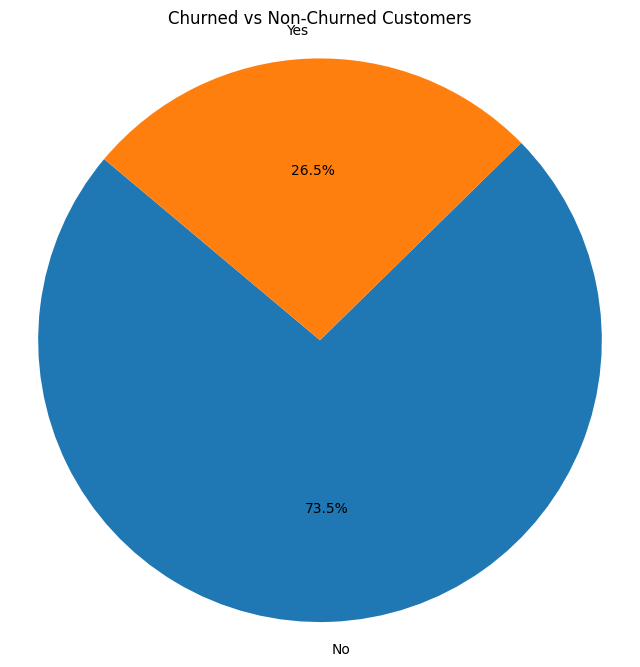

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load or define the 'data' variable
# For example:
file_path = '/content/drive/MyDrive/Telecoms Company data.csv'
data = pd.read_csv(file_path)

# Drop any rows with missing values
data.dropna(inplace=True)

# Calculate the number of churned and non-churned customers
churn_counts = data['Churn'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Churned vs Non-Churned Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


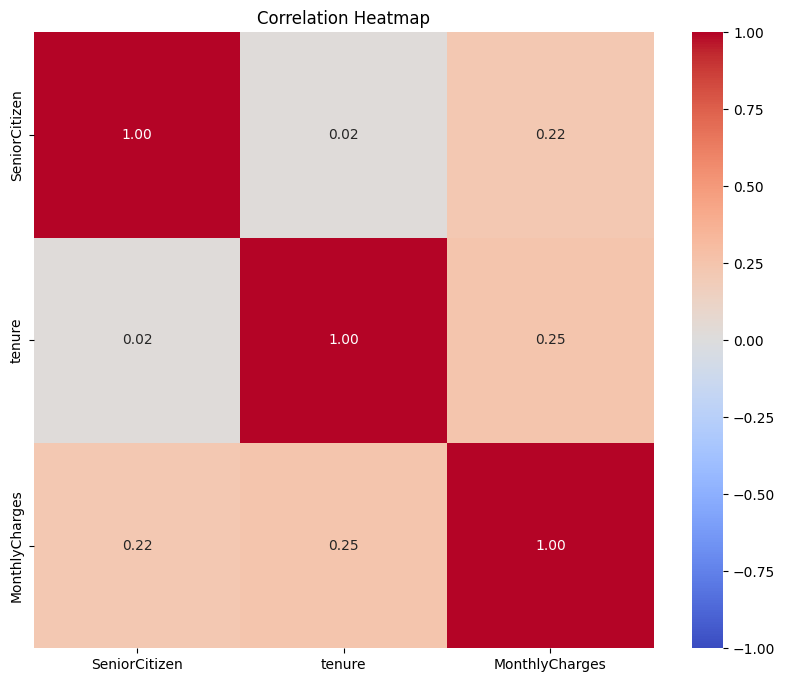

In [ ]:
import seaborn as sns

# Select numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


**P.S: I had to know the values of my data for better visualization.**

In [ ]:
# Display column names and data types
print(data.columns)
print(data.dtypes)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


**A stack bar chart the churn rate over the contract type.**

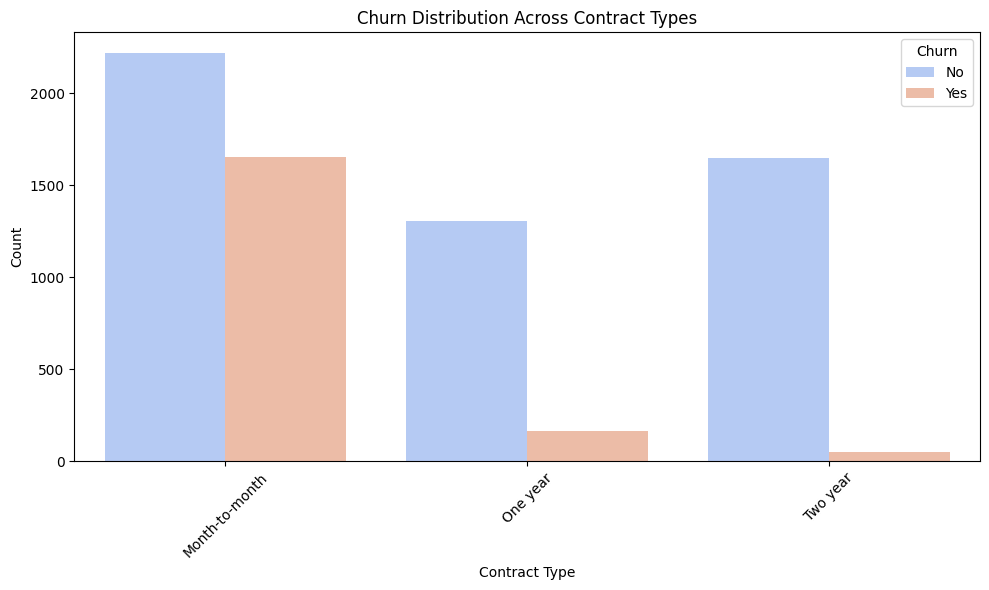

In [ ]:
import seaborn as sns

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Contract', hue='Churn', palette='coolwarm')
plt.title('Churn Distribution Across Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


**A voilin plot showing the rate of churn over the contract type.**

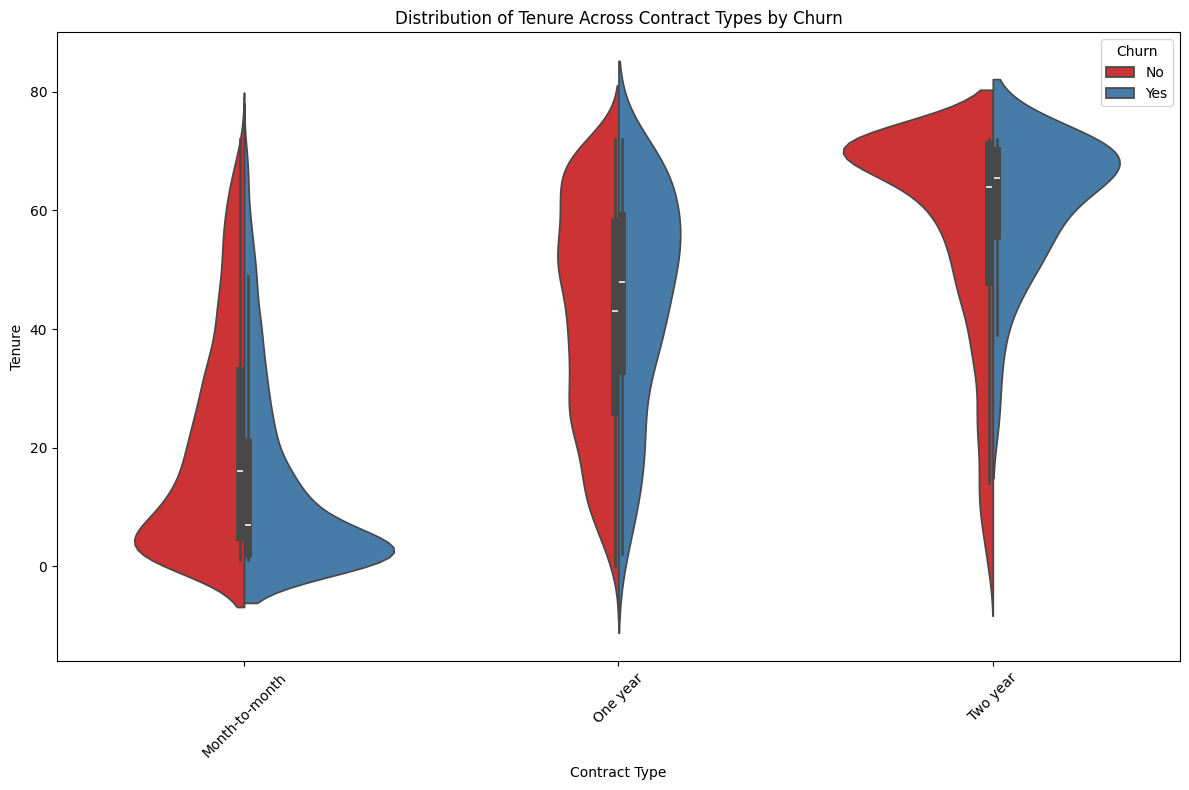

In [ ]:
import seaborn as sns

# Set up the figure
plt.figure(figsize=(12, 8))

# Create a violin plot
sns.violinplot(data=data, x='Contract', y='tenure', hue='Churn', split=True, palette='Set1')

# Set the title and labels
plt.title('Distribution of Tenure Across Contract Types by Churn')
plt.xlabel('Contract Type')
plt.ylabel('Tenure')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()


**The Distribution Curve of Churn**

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


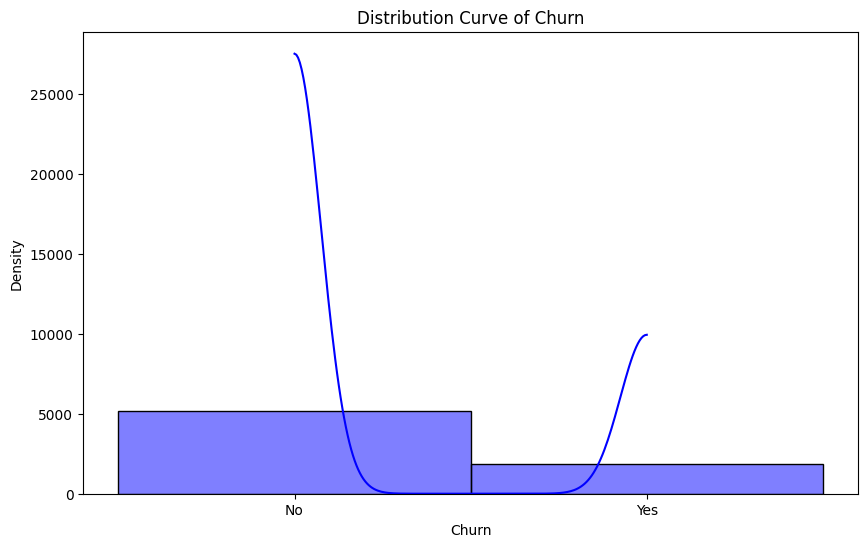

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load or define the 'data' variable
# For example:
file_path = '/content/drive/MyDrive/Telecoms Company data.csv'
data = pd.read_csv(file_path)

# Drop any rows with missing values
data.dropna(inplace=True)

# Check the columns in your dataset
print(data.columns)

# Choose the column for which you want to plot the distribution curve
column_to_plot = 'Churn'  # Replace 'Churn' with the actual column name you want to plot

# Plot the distribution curve
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x=column_to_plot, kde=True, color='blue')
plt.title('Distribution Curve of {}'.format(column_to_plot))
plt.xlabel(column_to_plot)
plt.ylabel('Density')
plt.show()


**Customer Rentention Curve**

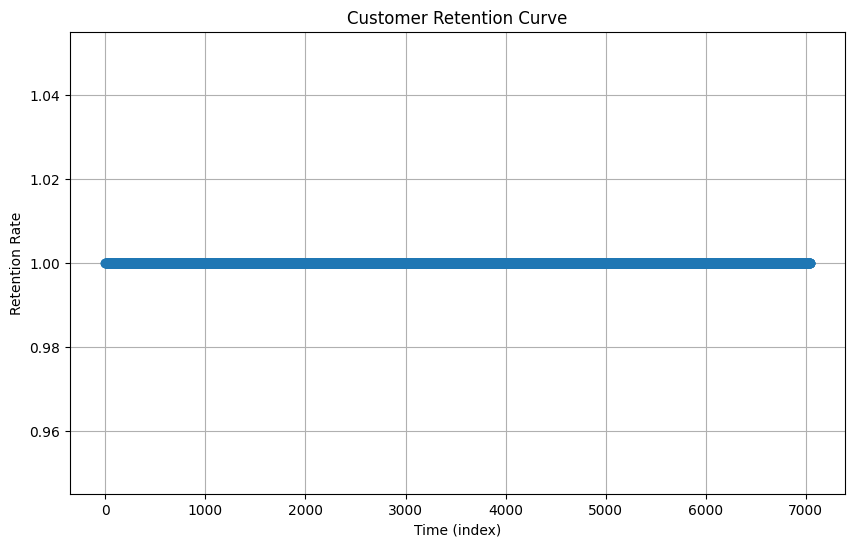

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load or define the 'data' variable
# For example:
file_path = '/content/drive/MyDrive/Telecoms Company data.csv'
data = pd.read_csv(file_path)

# Drop any rows with missing values
data.dropna(inplace=True)

# Assuming you have a column named 'CustomerID' and 'Churn' in your dataset
# Convert the 'Churn' column to boolean (1 for churned, 0 for retained)
data['Churn'] = data['Churn'].astype(bool)

# Sort data by index (which represents the order of entries)
data.sort_index(inplace=True)

# Calculate cumulative retention rate over time
data['Retention'] = data['Churn'].cumsum() / (data.index + 1)

# Plot the Customer Retention Curve
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Retention'], marker='o', linestyle='-')
plt.title('Customer Retention Curve')
plt.xlabel('Time (index)')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.show()


### **Model Deployment on Heroku:**

1. Prepare your model for deployment by saving it using scikit-learn's joblib or pickle.
2. Create a web application using a framework like Flask or Django to serve predictions.
3. Deploy your application on Heroku by following their deployment guides and utilizing tools like Git for version control.
4. Ensure that your deployed model can handle incoming requests and provide real-time predictions.

**Convert data from .csv to .pkl**

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# File paths
csv_file_path = '/content/drive/MyDrive/Telecoms Company data.csv'
pickle_file_path = '/content/drive/MyDrive/Telecoms Company data.pkl'

# Convert CSV to pickle
data = pd.read_csv(csv_file_path)
data.to_pickle(pickle_file_path)

print("CSV file converted to pickle successfully.")

# Read data from pickle
data_from_pickle = pd.read_pickle(pickle_file_path)

# Display information about the loaded data
print("Information about the loaded data:")
print(data_from_pickle.info())

# Display the first few rows of the loaded data
print("First few rows of the loaded data:")
print(data_from_pickle.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CSV file converted to pickle successfully.
Information about the loaded data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 

In [1]:
# app.py

from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Load the model
from google.colab import drive
drive.mount('/content/drive')
import joblib

# Load the model from Google Drive
model = joblib.load('/content/drive/MyDrive/Telecoms Company data.pkl')



@app.route('/')
def home():
    return 'Welcome to the Prediction API!'

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get data from request
        data = request.get_json()
        # Convert JSON data to DataFrame
        df = pd.DataFrame(data)
        # Make predictions
        predictions = model.predict(df)
        return jsonify(predictions.tolist())
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [5]:
!gunicorn \
      --workers 4 \
      --bind 0.0.0.0:5000 \
      app:app


/bin/bash: line 1: gunicorn: command not found
